In [1]:
%matplotlib inline
#%matplotlib qt
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
import rarbol

In [2]:
data = pd.read_csv('BaseVideosFinal.csv')
data.head()

,juegoNombre,juegoURL,VideoNombre,juegoPalabras,juegoLugar,juegoRating,juegoAvRating,juegoVoters,juegoAno,videoVistas,videoURL,videoMeses,videoMesesVistas,coincidencias,canalNombre,canalURL,canalSuscriptores,canalMeses,canalVistas,canalIdioma
0,Die Macher,/boardgame/1/die-macher,ë”” ë§ˆí—ˆ ë³´ë“œê²Œìž„ í•˜ëŠ” ë²• | Die Mache...,2,298,7.116,7.62,5273,1986,7942,/watch?v=R0JYiynyqOg,11,722,1,ë³´ë“œë¼ì´ë¸Œ BoardLiveGame,/channel/UC7MbQzcQc73UU489d8cR1VA,36500,53,10057308,ko
1,Die Macher,/boardgame/1/die-macher,"BOARD NEWS - Nowa akcja, Nemesis Lockdown , An...",2,298,7.116,7.62,5273,1986,5925,/watch?v=xv6rhHI2Dlg,12,494,1,ON TABLE Gry Planszowe,/channel/UCJldBgJLwVRGmdAQHt8ZoQg,22400,91,3636933,pl
2,Die Macher,/boardgame/1/die-macher,ë³´ë¼ëŒì´ì˜ ì„ íƒ 2020 ë³´ë“œë¼ì´ë¸Œ ë¯...,2,298,7.116,7.62,5273,1986,5154,/watch?v=rvkRQPV2j34,11,469,1,ë³´ë“œë¼ì´ë¸Œ BoardLiveGame,/channel/UC7MbQzcQc73UU489d8cR1VA,36500,53,10057308,ko
3,Die Macher,/boardgame/1/die-macher,"Co jest grane? Die Macher, WybrzeÅ¼e Mieczy i ...",2,298,7.116,7.62,5273,1986,5100,/watch?v=4cR0Iy0ZikY,12,425,1,GameTrollTV Gry Planszowe,/user/GameTrollTV,45100,131,12088604,pl
4,Die Macher,/boardgame/1/die-macher,Die Macher - Brettspiel - Let's Play mit Peat ...,2,298,7.116,7.62,5273,1986,7867,/watch?v=-SI-ZxihlBE,24,328,1,Hunter & Friends - Brettspiele,/user/hunterundcron,64000,92,29073868,de


# Eliminamos información no relevante

In [3]:
data2 = data.drop(['juegoNombre','canalIdioma','juegoAno','juegoURL','VideoNombre','juegoPalabras','juegoLugar','videoURL','videoMesesVistas','coincidencias','canalNombre','canalURL'],axis=1)
data = data.drop(['juegoURL','VideoNombre','juegoPalabras','juegoLugar','videoURL','videoMesesVistas','coincidencias','canalNombre','canalURL'],axis=1)
data.head()

,juegoNombre,juegoRating,juegoAvRating,juegoVoters,juegoAno,videoVistas,videoMeses,canalSuscriptores,canalMeses,canalVistas,canalIdioma
0,Die Macher,7.116,7.62,5273,1986,7942,11,36500,53,10057308,ko
1,Die Macher,7.116,7.62,5273,1986,5925,12,22400,91,3636933,pl
2,Die Macher,7.116,7.62,5273,1986,5154,11,36500,53,10057308,ko
3,Die Macher,7.116,7.62,5273,1986,5100,12,45100,131,12088604,pl
4,Die Macher,7.116,7.62,5273,1986,7867,24,64000,92,29073868,de


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87286 entries, 0 to 87285
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   juegoNombre        87286 non-null  object 
 1   juegoRating        87286 non-null  float64
 2   juegoAvRating      87286 non-null  float64
 3   juegoVoters        87286 non-null  int64  
 4   juegoAno           87286 non-null  int64  
 5   videoVistas        87286 non-null  int64  
 6   videoMeses         87286 non-null  int64  
 7   canalSuscriptores  87286 non-null  int64  
 8   canalMeses         87286 non-null  int64  
 9   canalVistas        87286 non-null  int64  
 10  canalIdioma        87286 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 7.3+ MB


In [5]:
data.describe()

,juegoRating,juegoAvRating,juegoVoters,juegoAno,videoVistas,videoMeses,canalSuscriptores,canalMeses,canalVistas
count,87286.000000,87286.000000,87286.000000,87286.000000,8.728600e+04,87286.000000,8.728600e+04,87286.000000,8.728600e+04
mean,6.623815,7.382384,8418.335357,2013.999404,1.020357e+04,33.917673,7.124910e+04,98.334418,4.124369e+07
std,0.661473,0.557657,13215.097620,6.814632,1.597206e+05,27.411250,5.628726e+05,46.807800,5.252353e+08
min,5.661000,5.810000,106.000000,1909.000000,0.000000e+00,1.000000,0.000000e+00,4.000000,4.640000e+02
25%,6.037000,6.990000,1011.000000,2012.000000,2.830000e+02,12.000000,1.590000e+03,60.000000,2.731620e+05
50%,6.578000,7.370000,2931.000000,2016.000000,1.056000e+03,24.000000,5.980000e+03,92.000000,1.267954e+06
75%,7.096000,7.770000,9577.000000,2018.000000,3.968000e+03,48.000000,2.510000e+04,128.000000,5.878545e+06
max,8.456000,9.110000,86642.000000,2021.000000,2.537703e+07,180.000000,3.000000e+07,186.000000,4.789800e+10


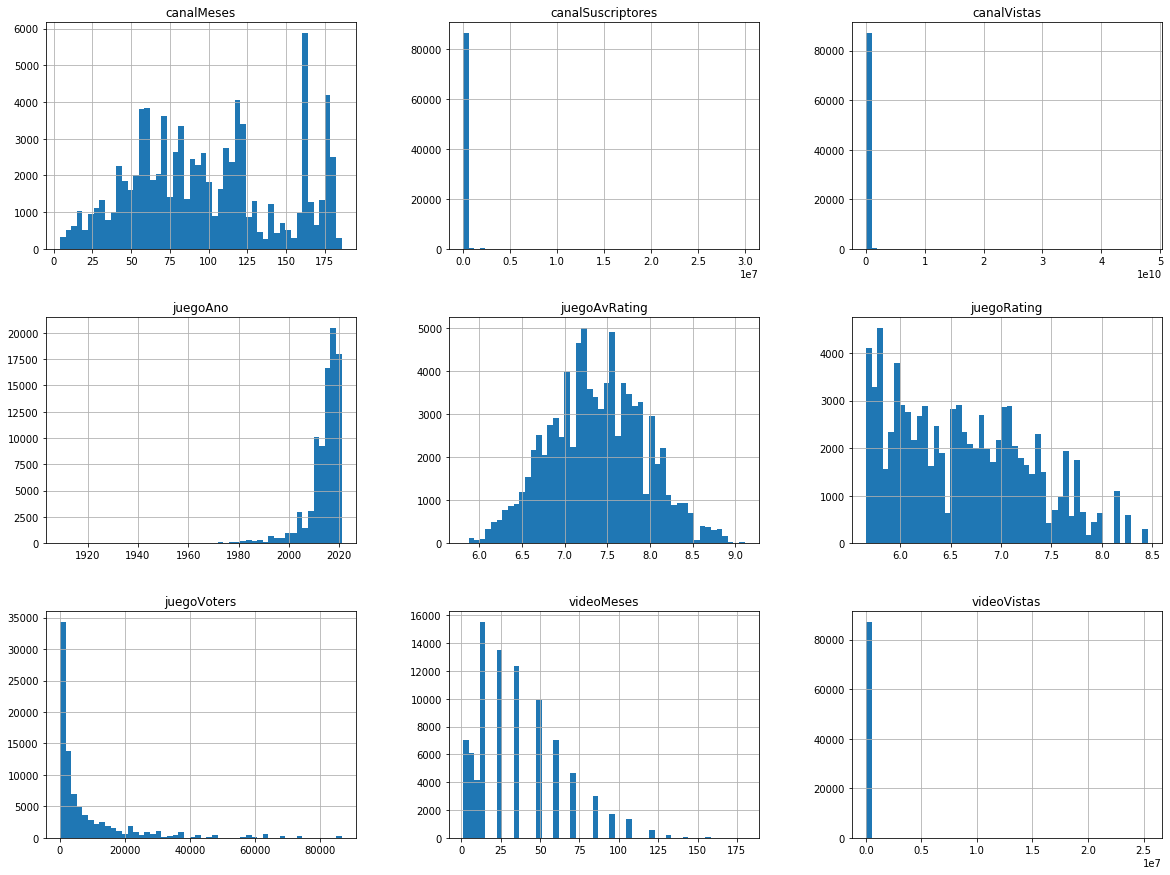

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
corr_matrix = data.corr()
corr_matrix["videoVistas"].sort_values(ascending=False)

videoVistas          1.000000
canalVistas          0.678406
canalSuscriptores    0.562101
videoMeses           0.033045
canalMeses           0.027702
juegoVoters          0.020725
juegoRating         -0.004481
juegoAvRating       -0.022976
juegoAno            -0.026716
Name: videoVistas, dtype: float64

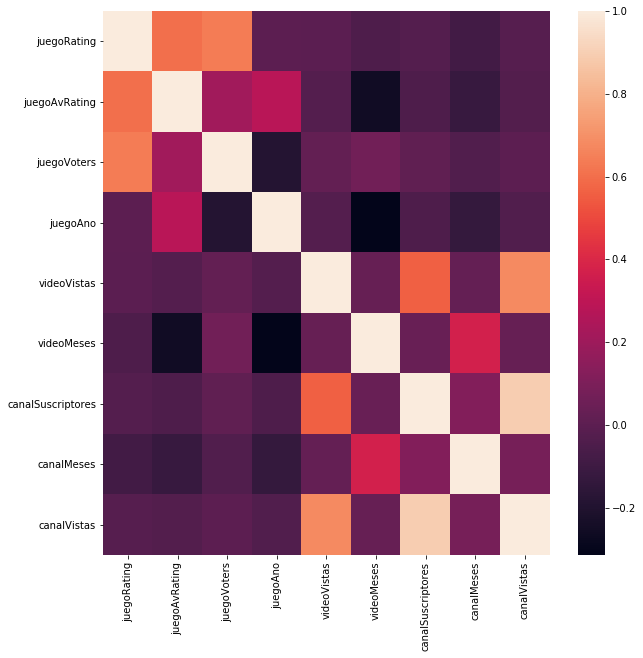

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix)

In [9]:
Y = data["videoVistas"]
X = data.drop(["videoVistas"],axis=1)
X_cat = data.select_dtypes(include = 'object').copy()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBA4BCCB08>,
      dtype=object)

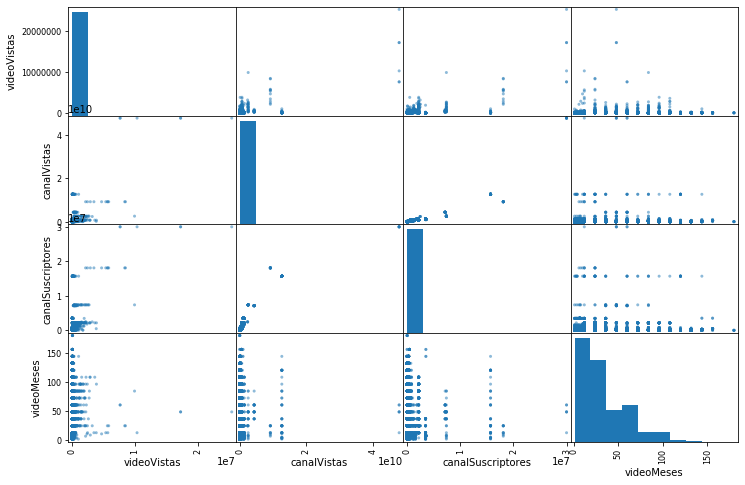

In [10]:
attributes = ["videoVistas","canalVistas", "canalSuscriptores","videoMeses"]
scatter_matrix(data[attributes], figsize=(12, 8))

Text(0.5, 0, 'Vistas')

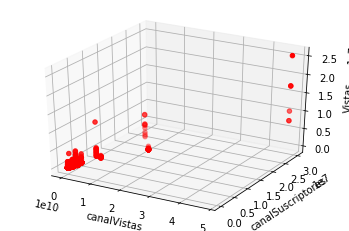

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['canalVistas'], X['canalSuscriptores'], Y, c='r', marker='o')
ax.set_xlabel('canalVistas')
ax.set_ylabel('canalSuscriptores')
ax.set_zlabel('Vistas')

# Preparación de datos

In [12]:
Y = data["videoVistas"]
X = data.drop(["videoVistas","juegoNombre","canalIdioma"],axis=1)
scaler = StandardScaler()
scaler.fit(X)
X_prepared = scaler.transform(X)
X_train_prepared, X_test_prepared, y_train, y_test = train_test_split(X_prepared, Y, test_size = 0.2, random_state = 42)

### Regresión Lineal simple

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

Score del entrenamiento

In [23]:
lin_reg.score(X_train_prepared,y_train)

0.3722915626880212

Score del test

In [24]:
lin_reg.score(X_test_prepared,y_test)

0.4922576904983208

Validación Cruzada

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lin_reg_cross = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(lin_reg_cross, X_train_prepared, y_train,scoring='r2', cv=folds)
scores.mean()

0.08346970796163736

### Regresión Lineal con regularización

In [28]:
lin_reg_ridge = Ridge(alpha=1)
lin_reg_ridge.fit(X_train_prepared, y_train)

Ridge(alpha=1)

Score entrenamiento

In [29]:
lin_reg_ridge.score(X_train_prepared,y_train)

0.37229156237571703

Score prueba

In [30]:
lin_reg_ridge.score(X_test_prepared,y_test)

0.4922451501085938

Validación cruzada

In [32]:
lin_reg_ridge_cross = Ridge(alpha=1)
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores_ridge = cross_val_score(lin_reg_ridge_cross, X_train_prepared, y_train,scoring='r2', cv=folds)
scores.mean()

0.08346970796163736

### Arbol de regresión

In [33]:
estimadores = 4
deep = 10
tree_reg = DecisionTreeRegressor(max_depth=deep)
tree_reg.fit(X_train_prepared, y_train)
print(f"Produndidad: {deep} ")

Produndidad: 10 


Score entrenamiento

In [34]:
print(f"Score entrenamiento Arbol regresion {tree_reg.score(X_train_prepared,y_train)}")

Score entrenamiento Arbol regresion 0.9226553717888518


Score de la prueba

In [35]:
print(f"Score prueba Arbol regresion {tree_reg.score(X_test_prepared,y_test)}")

Score prueba Arbol regresion 0.8409686535348806


Validación cruzada

In [36]:
tree_reg_ridge_cross = DecisionTreeRegressor(max_depth=deep)
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores_tree_reg = cross_val_score(tree_reg_ridge_cross, X_train_prepared, y_train,scoring='r2', cv=folds)
scores_tree_reg.mean()

0.5001740740299647

### Random Forest 

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=deep,n_estimators = estimadores, random_state = 42)
rf.fit(X_train_prepared, y_train)

RandomForestRegressor(max_depth=10, n_estimators=4, random_state=42)

Score para el entrenamiento

In [38]:
print(f"El score para el train RF {rf.score(X_train_prepared,y_train)}")

El score para el train RF 0.9105227672240738


Score para prueba

In [39]:
print(f"El score para el test RF {rf.score(X_test_prepared,y_test)}")

El score para el test RF 0.8469030034535622


Validación cruzada

In [40]:
rf_cross = RandomForestRegressor(max_depth=deep,n_estimators = estimadores, random_state = 42)
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores_rf = cross_val_score(rf_cross, X_prepared, Y,scoring='r2', cv=folds)
scores_rf

array([-0.55307725,  0.81232991,  0.68566928,  0.62632417,  0.69788423,
        0.35592923,  0.7497116 ,  0.4776726 ,  0.26653859,  0.81269462])

In [41]:
scores_rf.mean()

0.4931676983188639

# Libreria propia
Aquí se utiliza una implementación del arbol de regresión propia no esta tan optimizada como la versión de sklearn pero se utilizo como practica y para validación de datos

In [104]:
datap = pd.read_csv('BaseVideosFinal.csv')
datap = datap.drop(['juegoNombre','canalIdioma','juegoAno','juegoURL','VideoNombre','juegoPalabras','juegoLugar','videoURL','videoMesesVistas','coincidencias','canalNombre','canalURL'],axis=1)
Y_mio = datap["videoVistas"]
X_mio = datap.drop(["videoVistas"],axis=1)

In [105]:
X_train_mio, X_test_mio, y_train_mio, y_test_mio = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [106]:
arbol = rarbol.arbolRegresion(y_train_mio,X_train_mio,"RSS",20,10)

In [108]:
arbol.entrenar()

In [85]:
arbol.imprimirArbol()

|--- juegoAvRating <= 9.094999999999999
|   |--- canalMeses <= 4.5
|   |   |    valor: 6.555555555555555
|   |--- canalMeses > 4.5
|   |   |--- juegoVoters <= 108.5
|   |   |   |    valor: 884.2857142857143
|   |   |--- juegoVoters > 108.5
|   |   |   |--- juegoVoters <= 113.0
|   |   |   |   |    valor: 631.8181818181819
|   |   |   |--- juegoVoters > 113.0
|   |   |   |   |--- juegoVoters <= 115.5
|   |   |   |   |   |    valor: 769.2857142857143
|   |   |   |   |--- juegoVoters > 115.5
|   |   |   |   |   |--- canalVistas <= 2020.0
|   |   |   |   |   |   |--- juegoAno <= 2018.5
|   |   |   |   |   |   |   |--- juegoRating <= 7.533
|   |   |   |   |   |   |   |   |--- juegoAno <= 2017.0
|   |   |   |   |   |   |   |   |   |--- juegoRating <= 5.8835
|   |   |   |   |   |   |   |   |   |   |    valor: 12.0
|   |   |   |   |   |   |   |   |   |--- juegoRating > 5.8835
|   |   |   |   |   |   |   |   |   |   |    valor: 22.266666666666666
|   |   |   |   |   |   |   |   |--- juegoAno > 

In [109]:
print(f"El valor de la calificación para el set de entrenamiento es: {arbol.calEntrenamieto()}")

El valor de la calificación para el set de entrenamiento es: 0.750875536952595


In [110]:
print(f"El valor de la calificación para el set de Prueba es: {arbol.calPrueba(X_test_mio,y_test_mio)}")

El valor de la calificación para el set de Prueba es: 0.4914140724302466
